<a href="https://colab.research.google.com/github/jrohauer/ECGR4105/blob/main/HW4_SVR_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Josh Rohauer
# 8007098398
# Homework 4


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import metrics

from google.colab import drive
drive.mount('/content/drive')

#Problem 1
#Preprocessing
file_path = '/content/drive/My Drive/ML_data/cancer.csv'
cancer_dataset = pd.read_csv(file_path)


Mounted at /content/drive


In [ ]:

#Mapping text to number
varlist =  ['diagnosis']
def binary_map(x):
    return x.map({'B': 0, 'M': 1})

cancer_dataset[varlist] = cancer_dataset[varlist].apply(binary_map)


cancer_X = cancer_dataset.loc[:, ~cancer_dataset.columns.isin(['id', 'diagnosis','Unnamed: 32'])]
cancer_Y = cancer_dataset['diagnosis'].values



np.random.seed(17)
cancer_X_train, cancer_X_test, cancer_Y_train, cancer_Y_test = train_test_split(cancer_X,cancer_Y, train_size = 0.8, test_size = 0.2, random_state = 100)


In [ ]:
#Scalar normalization
scalerMM = MinMaxScaler()
scalerSS = StandardScaler()


#Min Max or Standard normalize
cancer_X_train = scalerMM.fit_transform(cancer_X_train)
cancer_X_test = scalerMM.fit_transform(cancer_X_test)
# df_train = scalerSS.fit_transform(df_train)
# df_test = scalerSS.fit_transform(df_test)


PCA_cancer_results=pd.DataFrame(columns=['K','Accuracy','Precision','Recall','F1'])
SVC_accuracy=pd.DataFrame(columns=['K','Linear Accuracy','RBF Accuracy','Poly Accuracy'])

In [ ]:

K=20
arange=np.arange(1,K)
for i in arange:
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(cancer_X_train)
    principalComponents_test = pca.fit_transform(cancer_X_test)

    # Fit regression model
    svc_rbf = SVC(kernel='rbf', C=1e3, gamma=0.1)
    svc_lin = SVC(kernel='linear', C=1e3)
    svc_poly = SVC(kernel='poly', C=1e3, degree=2)
#    y_rbf = svr_rbf.fit(cancer_X_train, cancer_Y_train).predict(cancer_X_test)
    cancer_Y_pred = svc_lin.fit(principalComponents, cancer_Y_train).predict(principalComponents_test)
    cancer_Y_pred_rbf = svc_rbf.fit(principalComponents, cancer_Y_train).predict(principalComponents_test)
    cancer_Y_pred_poly = svc_poly.fit(principalComponents, cancer_Y_train).predict(principalComponents_test)
#    y_poly = svr_poly.(cancer_X_train, cancer_Y_train).predict(cancer_X_test)

    accuracy = metrics.accuracy_score(cancer_Y_test, cancer_Y_pred)
    accuracy_rbf = metrics.accuracy_score(cancer_Y_test, cancer_Y_pred_rbf)
    accuracy_poly = metrics.accuracy_score(cancer_Y_test, cancer_Y_pred_poly)

    accuracy = metrics.accuracy_score(cancer_Y_test, cancer_Y_pred)
    precision = metrics.precision_score(cancer_Y_test, cancer_Y_pred)
    recall = metrics.recall_score(cancer_Y_test, cancer_Y_pred)
    f1 = metrics.f1_score(cancer_Y_test, cancer_Y_pred)

    cancer_data= {'K':i,'Accuracy':accuracy,'Precision':precision,'Recall': recall,'F1': f1}
    kernal_data= {'K':i,'Linear Accuracy':accuracy,'RBF Accuracy':accuracy_rbf,'Poly Accuracy':accuracy_poly}

    append_data = pd.DataFrame(data=cancer_data,index=[i])
    accuracy_data = pd.DataFrame(data=kernal_data,index=[i])
    PCA_cancer_results=pd.concat([PCA_cancer_results,append_data])
    SVC_accuracy=pd.concat([SVC_accuracy,accuracy_data])

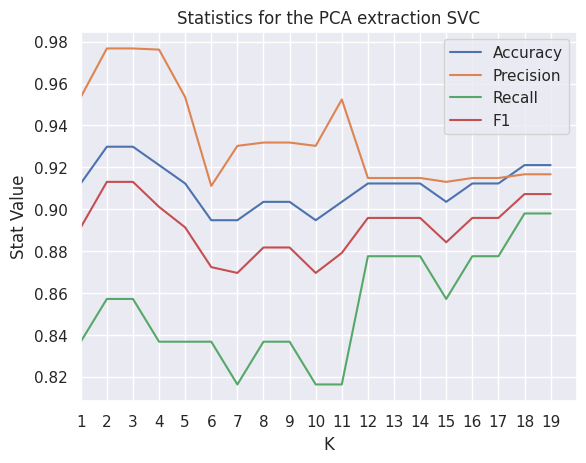

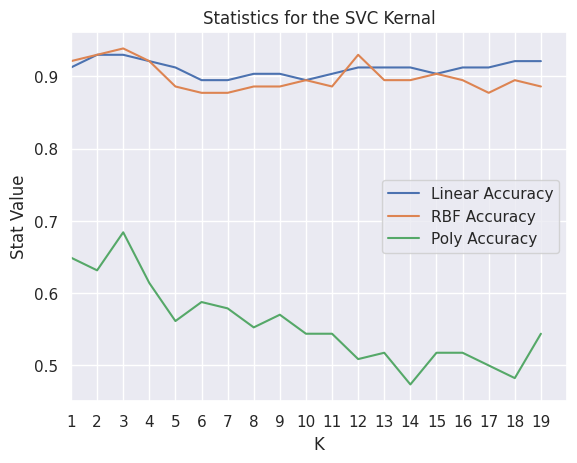

In [ ]:
#Plot stats for PCA/SVC
fig1, ax = plt.subplots()
ax.plot(PCA_cancer_results['Accuracy'])
ax.plot(PCA_cancer_results['Precision'])
ax.plot(PCA_cancer_results['Recall'])
ax.plot(PCA_cancer_results['F1'])
ax.legend(['Accuracy','Precision','Recall','F1'])
ax.set_title('Statistics for the PCA extraction SVC')
ax.set_xlabel('K')
ax.set_ylabel('Stat Value')
ax.set_xlim(1,K)
ax.set_xticks(arange)

#Plot stats for SVC Kernal
fig1, ax = plt.subplots()
ax.plot(SVC_accuracy['Linear Accuracy'])
ax.plot(SVC_accuracy['RBF Accuracy'])
ax.plot(SVC_accuracy['Poly Accuracy'])

ax.legend(['Linear Accuracy','RBF Accuracy','Poly Accuracy'])
ax.set_title('Statistics for the SVC Kernal')
ax.set_xlabel('K')
ax.set_ylabel('Stat Value')
ax.set_xlim(1,K)
ax.set_xticks(arange)

In [ ]:
#Problem 2


#Preprocessing
file_path = '/content/drive/My Drive/ML_data/Housing.csv'
dataset = pd.read_csv(file_path)

#Mapping text to number
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

dataset[varlist] = dataset[varlist].apply(binary_map)

#Split data into training and validation
np.random.seed(17)
df_train, df_test = train_test_split(dataset, train_size = 0.8, test_size = 0.2, random_state = 100)

#Separate Y and X inputs

X_Vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']

Y_train = np.array(df_train['price'])
X_train = df_train[X_Vars]

Y_test = np.array(df_test['price'])
X_test = df_test[X_Vars]

In [ ]:

# part 3

SVC_housing_RMSE=pd.DataFrame(columns=['K','Linear RMSE'])

K=10
arange=np.arange(1,K)
for i in arange:
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(X_train)
    principalComponents_test = pca.fit_transform(X_test)

    # Fit regression model
    svr_lin = SVR(kernel='linear', C=10,cache_size=10000)

    Y_fit = svr_lin.fit(principalComponents, Y_train)
    Y_pred = Y_fit.predict(principalComponents_test)

    RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))

    kernal_data= {'K':i,'Linear RMSE':RMSE}
    RMSE_data = pd.DataFrame(data=kernal_data,index=[i])
    SVC_housing_RMSE=pd.concat([SVC_housing_RMSE,RMSE_data])

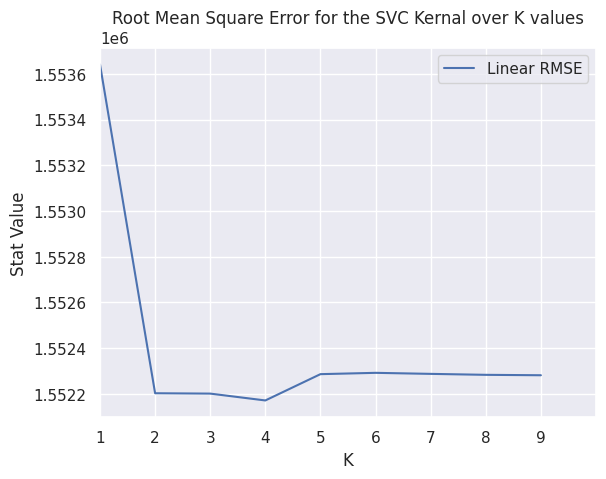

In [ ]:

#Plot stats for SVC PCA and Kernal
fig1, ax = plt.subplots()
ax.plot(SVC_housing_RMSE['Linear RMSE'])


ax.legend(['Linear RMSE'])
ax.set_title('Root Mean Square Error for the SVC Kernal over K values')
ax.set_xlabel('K')
ax.set_ylabel('Stat Value')
ax.set_xlim(1,K)
ax.set_xticks(arange)

In [ ]:


#part 4
SVC_kernal_RMSE=pd.DataFrame(columns=['K','Linear RMSE','RBF RMSE','Poly RMSE'])

svr_rbf = SVR(kernel='rbf', C=10, gamma=0.1)
svr_lin = SVR(kernel='linear', C=10,cache_size=10000)
svr_poly = SVR(kernel='poly', C=10, degree=2)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)

#Graph Principal Components
plt.scatter(principalComponents[:,0],principalComponents[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")


K=10
arange=np.arange(1,K)
for i in arange:
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(X_train)
    principalComponents_test = pca.fit_transform(X_test)

    # Fit regression model
    Y_fit = svr_lin.fit(principalComponents, Y_train)
    Y_pred = Y_fit.predict(principalComponents_test)
    Y_pred_rbf = svr_rbf.fit(principalComponents, Y_train).predict(principalComponents_test)
    Y_pred_poly = svr_poly.fit(principalComponents, Y_train).predict(principalComponents_test)

    #Calculate RMSE
    RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
    RMSE_rbf = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_rbf))
    RMSE_poly = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_poly))

    kernal_data= {'K':i,'Linear RMSE':RMSE,'RBF RMSE':RMSE_rbf,'Poly RMSE':RMSE_poly}
    RMSE_data = pd.DataFrame(data=kernal_data,index=[i])
    SVC_kernal_RMSE=pd.concat([SVC_kernal_RMSE,RMSE_data])


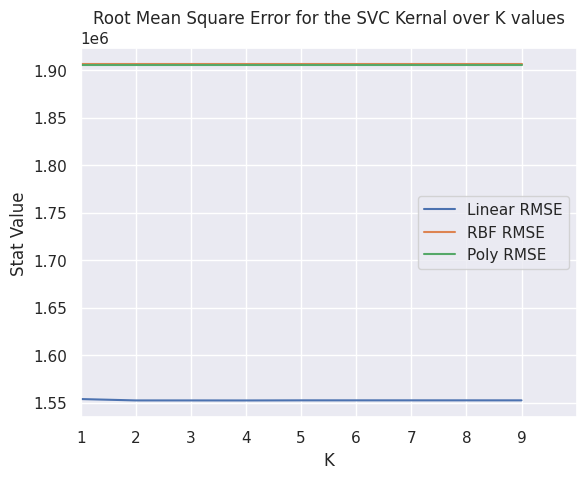

In [ ]:
#Plot stats for SVC PCA and Kernal
fig1, ax = plt.subplots()
ax.plot(SVC_kernal_RMSE['Linear RMSE'])
ax.plot(SVC_kernal_RMSE['RBF RMSE'])
ax.plot(SVC_kernal_RMSE['Poly RMSE'])
ax.legend(['Linear RMSE','RBF RMSE','Poly RMSE'])
ax.set_title('Root Mean Square Error for the SVC Kernal over K values')
ax.set_xlabel('K')
ax.set_ylabel('Stat Value')
ax.set_xlim(1,K)
ax.set_xticks(arange)
# print("Linear Kernal RMSE, K=3",'%.5f' % RMSE)
# print("RBF Kernal RMSE, K=3",'%.5f' % RMSE_rbf)
# print("Poly Kernal RMSE, K=3",'%.5f' % RMSE_poly)
